## CONCEPT PROBE VALIDATION SETS EDA

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np


In [24]:
def get_approach_color_map(df):
    unique_approaches = df["Approach"].unique()
    approach_colors = plt.cm.get_cmap("Set2", len(unique_approaches))
    return {approach: approach_colors(i % 8) for i, approach in enumerate(unique_approaches)}

In [25]:
def plot_pie_chart(df, title, col_name, approach_color_map):
    approach_sums = df.groupby("Approach")[col_name].sum()
    
    colors = [approach_color_map[approach] for approach in approach_sums.index]

    plt.figure(figsize=(6, 6))
    plt.pie(approach_sums, labels=approach_sums.index, autopct="%1.1f%%", startangle=140, colors=colors)
    plt.title(title)
    plt.show()

In [26]:
def plot_approach_batch_bar_chart(df, title, approach_color_map):
    df = df.sort_values(by=["Approach", "Batch"])

    batch_colors = [approach_color_map[approach] for approach in df["Approach"]]

    plt.figure(figsize=(12, 6))
    plt.bar(df["Batch Label"], df["Total Count"], color=batch_colors)

    plt.xlabel("Batches")
    plt.ylabel("Total Example Count")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")

    legend_patches = [Patch(color=approach_color_map[approach], label=approach) for approach in approach_color_map]
    plt.legend(handles=legend_patches, title="Approach", loc="lower right")

    plt.show()

In [27]:
def count_pos_neg(df):
    total_pos = df["Pos Count"].sum()
    total_neg = df["Neg Count"].sum()
    return total_pos, total_neg

In [28]:


def plot_pos_neg_counts(title: str, **datasets):
    categories = list(datasets.keys())
    pos_counts = []
    neg_counts = []

    for df in datasets.values():
        pos_count, neg_count = count_pos_neg(df)  
        pos_counts.append(pos_count)
        neg_counts.append(neg_count)

    x = np.arange(len(categories))  

    plt.figure(figsize=(10, 6))
    bar_width = 0.4
    plt.bar(x - bar_width / 2, pos_counts, width=bar_width, label="Positive Examples", color="lightblue")
    plt.bar(x + bar_width / 2, neg_counts, width=bar_width, label="Negative Examples", color="salmon")

    plt.xlabel("Concept")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(x, categories, rotation=30, ha="right")

    plt.legend()
    plt.show()

In [29]:
def plot_continuous_label_distribution(labels, title, bins=30):
    plt.figure(figsize=(8, 6))
    plt.hist(labels, bins=bins, color="royalblue", alpha=0.7, edgecolor="black")

    plt.xlabel("Label Value")
    plt.ylabel("Frequency")
    plt.title(title)
    
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()

In [30]:
# GemCollector validation sets
aq_left_val_set_counts = pd.read_csv("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gem_collector/validation_sets/aquamarine_left_probe_example_counts_method1.csv")
lava_1_above_val_set_counts = pd.read_csv("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gem_collector/validation_sets/lava_1_above_probe_example_counts_method3.csv")

aq_left_val_set = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gem_collector/validation_sets/aquamarine_left_probe_validation_dataset_method1.npy")
lava_1_above_val_set = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gem_collector/validation_sets/lava_1_above_probe_validation_dataset_method3.npy")

aq_left_val_set_labels = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gem_collector/validation_sets/aquamarine_left_probe_validation_label_set_method1.npy")
lava_1_above_val_set_labels = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gem_collector/validation_sets/lava_1_above_probe_validation_label_set_method3.npy")

print(f"Equal n of examples and labels, aquamarine_left: {len(aq_left_val_set) == len(aq_left_val_set_labels)}")
print(f"Equal n of examples and labels, lava_1_above: {len(lava_1_above_val_set) == len(lava_1_above_val_set_labels)}")


Equal n of examples and labels, aquamarine_left: True
Equal n of examples and labels, lava_1_above: True


/var/folders/9w/2pytp4_s6bj5_ff4zz3vl8ph0000gn/T/ipykernel_23743/1060496315.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  approach_colors = plt.cm.get_cmap("Set2", len(unique_approaches))


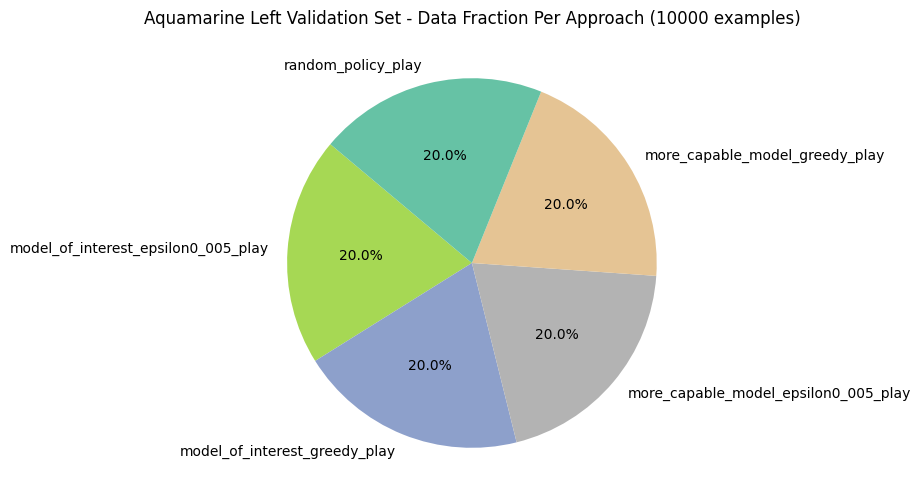

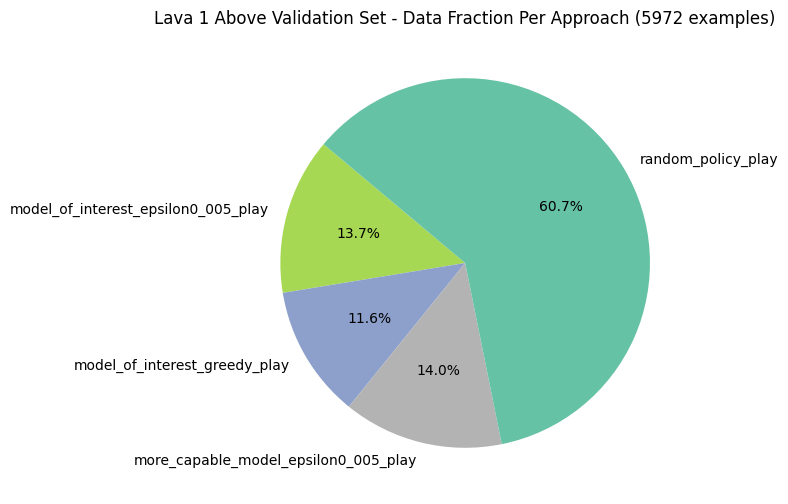

In [31]:

approach_color_map = get_approach_color_map(aq_left_val_set_counts)



plot_pie_chart(aq_left_val_set_counts, f"Aquamarine Left Validation Set - Data Fraction Per Approach ({len(aq_left_val_set)} examples)", "Total Count", approach_color_map)
plot_pie_chart(lava_1_above_val_set_counts, f"Lava 1 Above Validation Set - Data Fraction Per Approach ({len(lava_1_above_val_set)} examples)", "Total Count", approach_color_map)



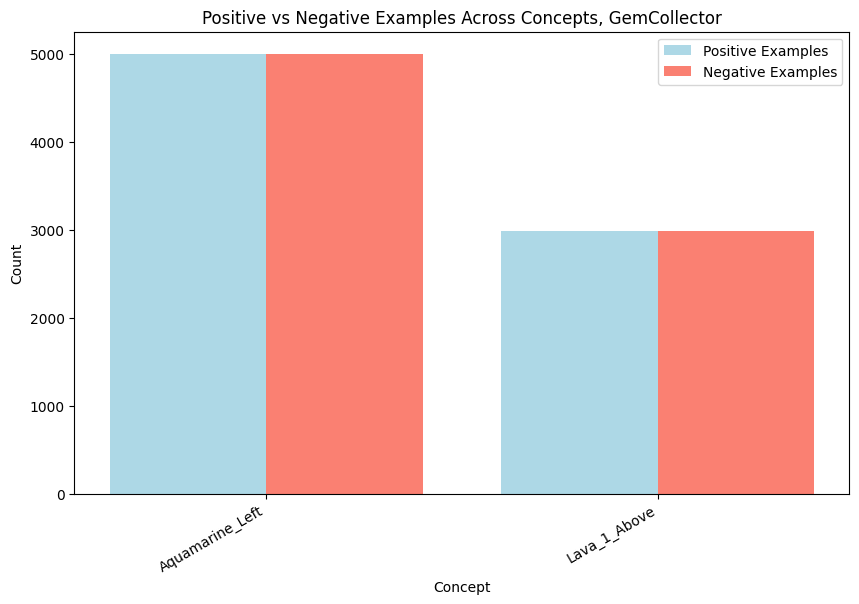

In [32]:


plot_pos_neg_counts(
    "Positive vs Negative Examples Across Concepts, GemCollector",
    Aquamarine_Left=aq_left_val_set_counts,
    Lava_1_Above=lava_1_above_val_set_counts,
)

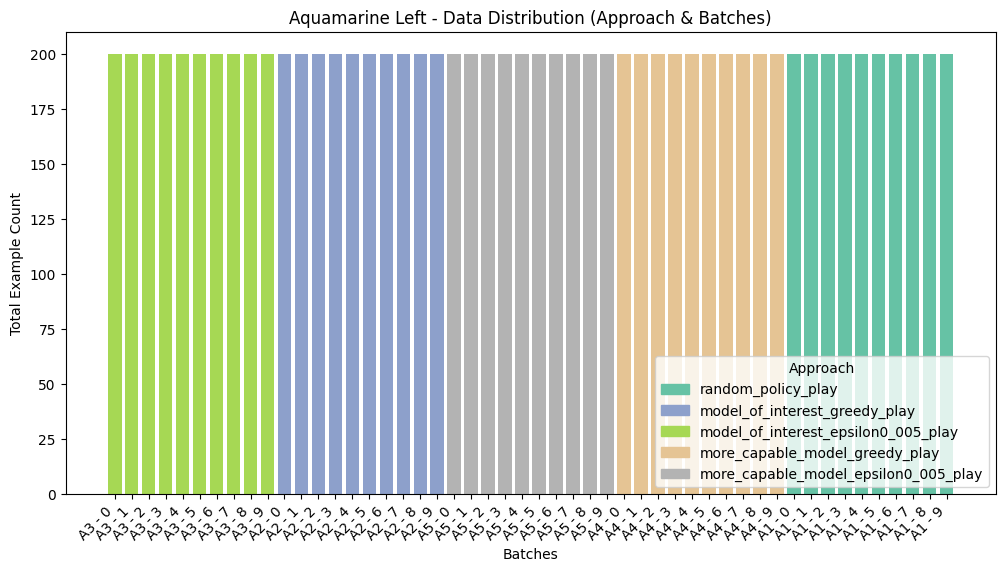

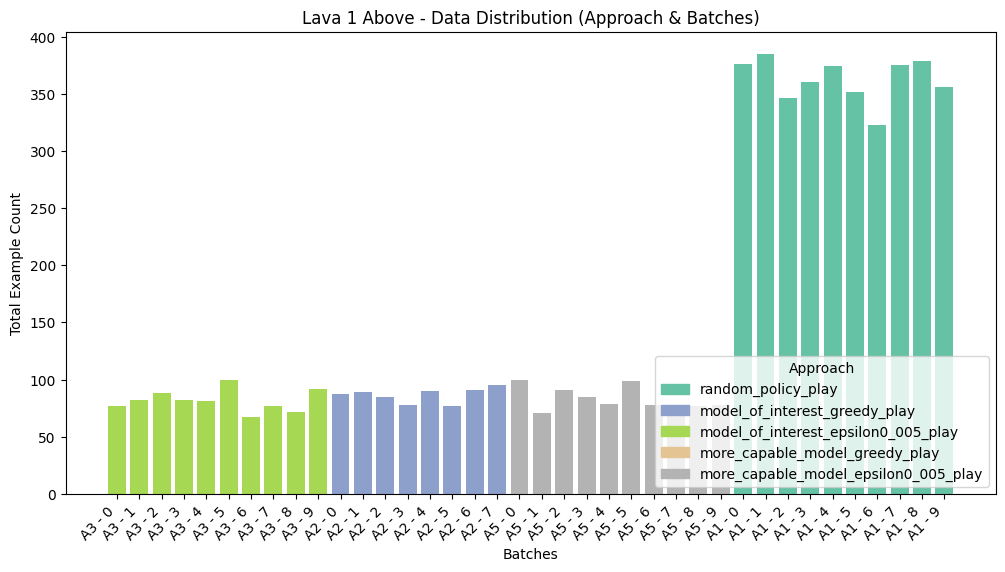

In [33]:
approach_mapping = {
    approach: str(i + 1) for i, approach in enumerate(aq_left_val_set_counts["Approach"].unique())
}

aq_left_val_set_counts["Batch Label"] = "A" + aq_left_val_set_counts["Approach"].map(approach_mapping) + " - " + aq_left_val_set_counts["Batch"].astype(str)
lava_1_above_val_set_counts["Batch Label"] = "A" + lava_1_above_val_set_counts["Approach"].map(approach_mapping) + " - " + lava_1_above_val_set_counts["Batch"].astype(str)

plot_approach_batch_bar_chart(aq_left_val_set_counts, "Aquamarine Left - Data Distribution (Approach & Batches)", approach_color_map)
plot_approach_batch_bar_chart(lava_1_above_val_set_counts, "Lava 1 Above - Data Distribution (Approach & Batches)", approach_color_map)

In [34]:
# MinecartCounter validation sets
minecart_n_val_set_counts = pd.read_csv("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/minecart_counter/validation_sets/minecarts_n_probe_example_counts_method1.csv")
minecart_1_left_val_set_counts = pd.read_csv("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/minecart_counter/validation_sets/minecart_1_left_probe_example_counts_method1.csv")

minecart_n_val_set = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/minecart_counter/validation_sets/minecarts_n_probe_validation_dataset_method1.npy")
minecart_1_left_val_set = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/minecart_counter/validation_sets/minecart_1_left_probe_validation_dataset_method1.npy")

minecart_n_val_set_labels = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/minecart_counter/validation_sets/minecarts_n_probe_validation_label_set_method1.npy")
minecart_1_left_val_set_labels = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/minecart_counter/validation_sets/minecart_1_left_probe_validation_label_set_method1.npy")

print(f"Equal n of examples and labels, minecart_n: {len(minecart_n_val_set) == len(minecart_n_val_set_labels)}")
print(f"Equal n of examples and labels, minecart_1_left: {len(minecart_1_left_val_set) == len(minecart_1_left_val_set_labels)}")


Equal n of examples and labels, minecart_n: True
Equal n of examples and labels, minecart_1_left: True


/var/folders/9w/2pytp4_s6bj5_ff4zz3vl8ph0000gn/T/ipykernel_23743/1060496315.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  approach_colors = plt.cm.get_cmap("Set2", len(unique_approaches))


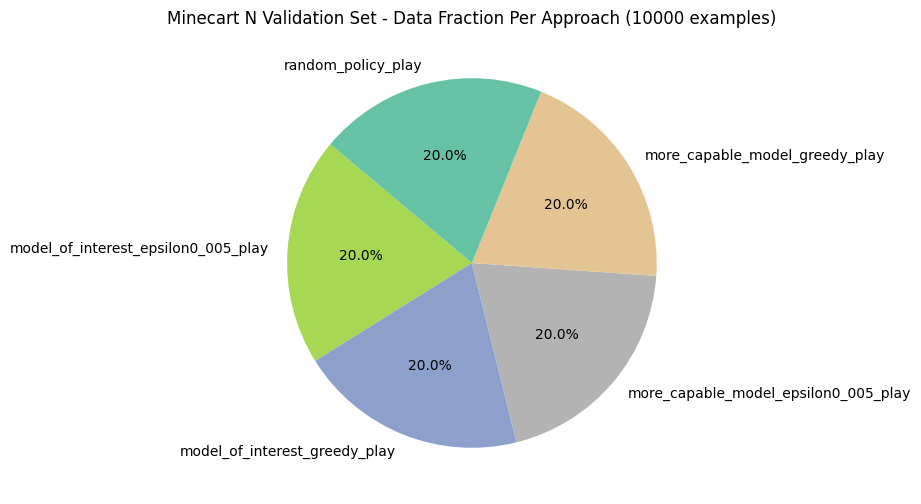

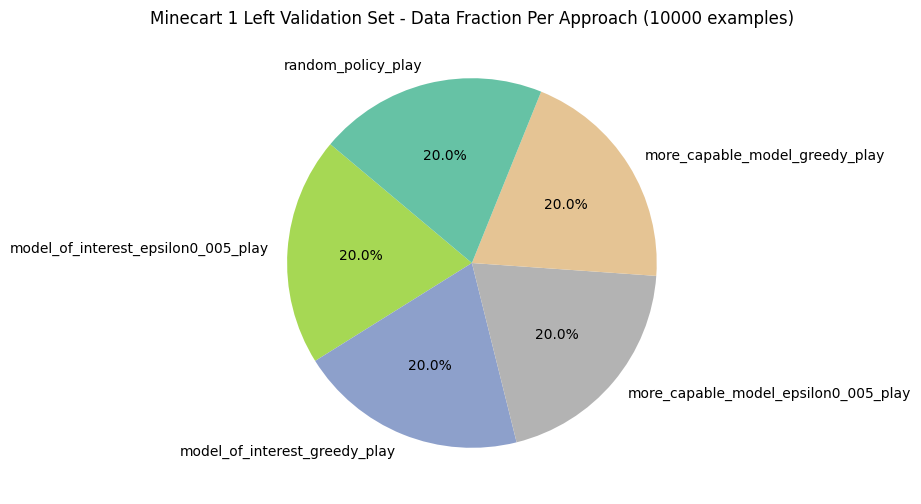

In [35]:
approach_color_map = get_approach_color_map(minecart_n_val_set_counts)



plot_pie_chart(minecart_n_val_set_counts, f"Minecart N Validation Set - Data Fraction Per Approach ({len(minecart_n_val_set)} examples)", "Total Count", approach_color_map)
plot_pie_chart(minecart_1_left_val_set_counts, f"Minecart 1 Left Validation Set - Data Fraction Per Approach ({len(minecart_1_left_val_set)} examples)", "Total Count", approach_color_map)


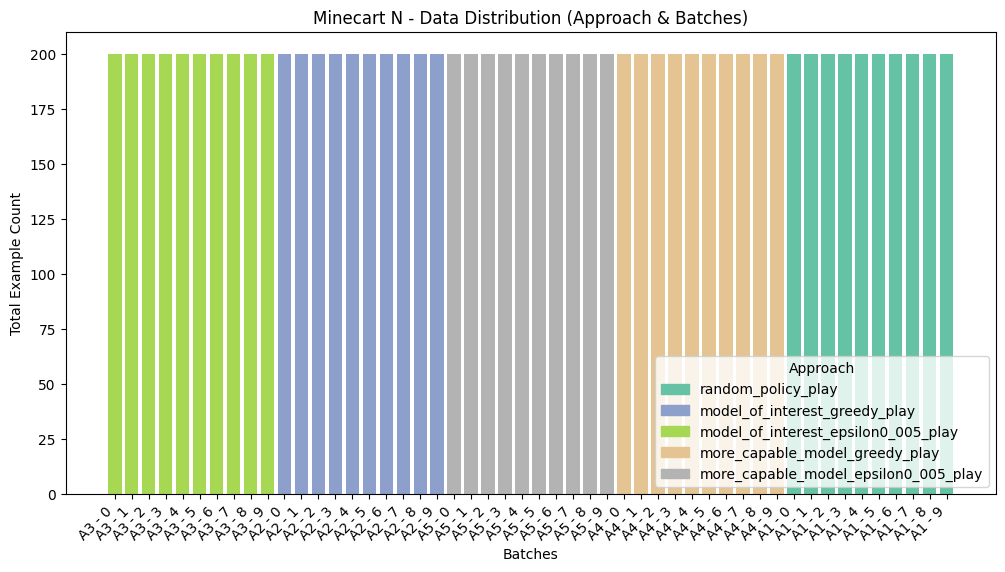

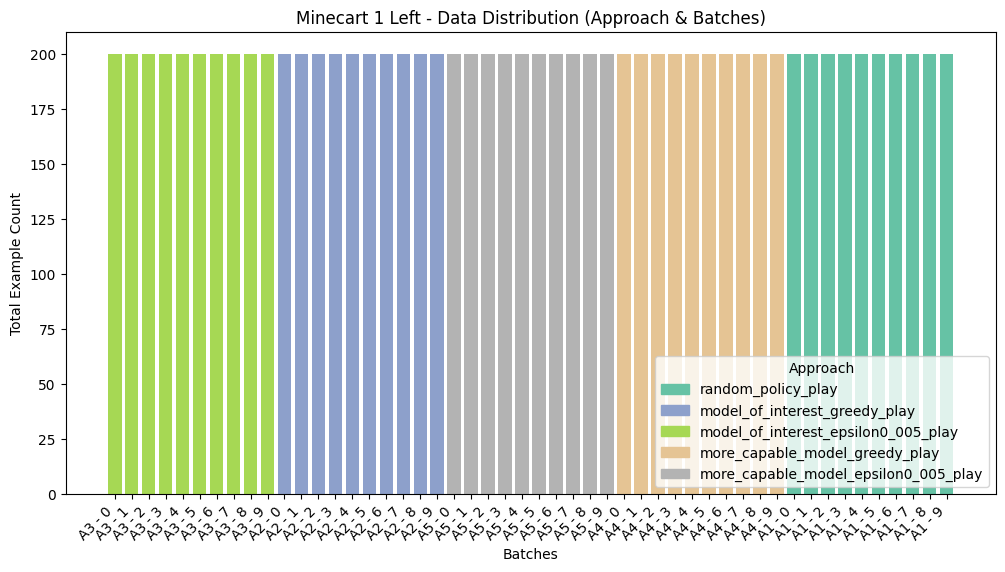

In [36]:
approach_mapping = {
    approach: str(i + 1) for i, approach in enumerate(minecart_n_val_set_counts["Approach"].unique())
}

minecart_n_val_set_counts["Batch Label"] = "A" + minecart_n_val_set_counts["Approach"].map(approach_mapping) + " - " + minecart_n_val_set_counts["Batch"].astype(str)
minecart_1_left_val_set_counts["Batch Label"] = "A" + minecart_1_left_val_set_counts["Approach"].map(approach_mapping) + " - " + minecart_1_left_val_set_counts["Batch"].astype(str)

plot_approach_batch_bar_chart(minecart_n_val_set_counts, "Minecart N - Data Distribution (Approach & Batches)", approach_color_map)
plot_approach_batch_bar_chart(minecart_1_left_val_set_counts, "Minecart 1 Left - Data Distribution (Approach & Batches)", approach_color_map)

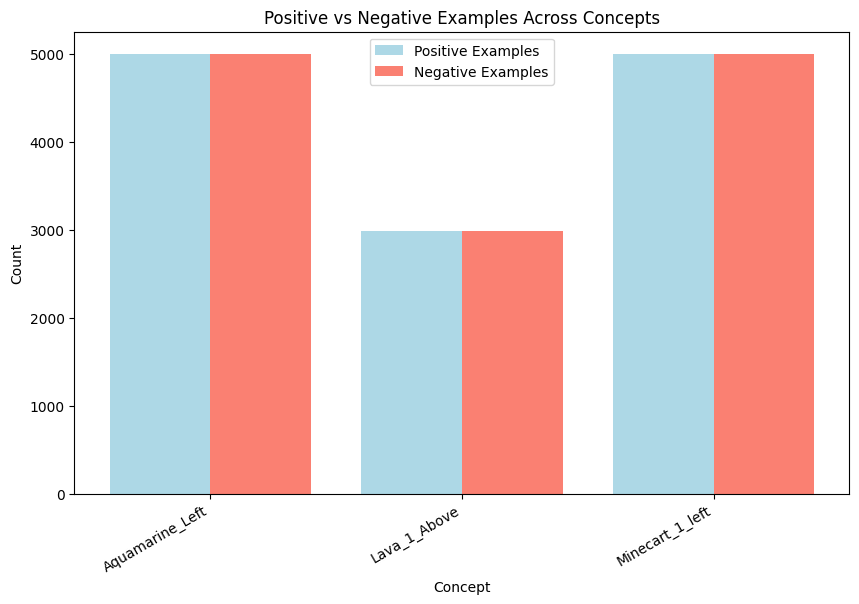

In [37]:
plot_pos_neg_counts(
    "Positive vs Negative Examples Across Concepts",
    Aquamarine_Left=aq_left_val_set_counts,
    Lava_1_Above=lava_1_above_val_set_counts,
    Minecart_1_left=minecart_1_left_val_set_counts,
)

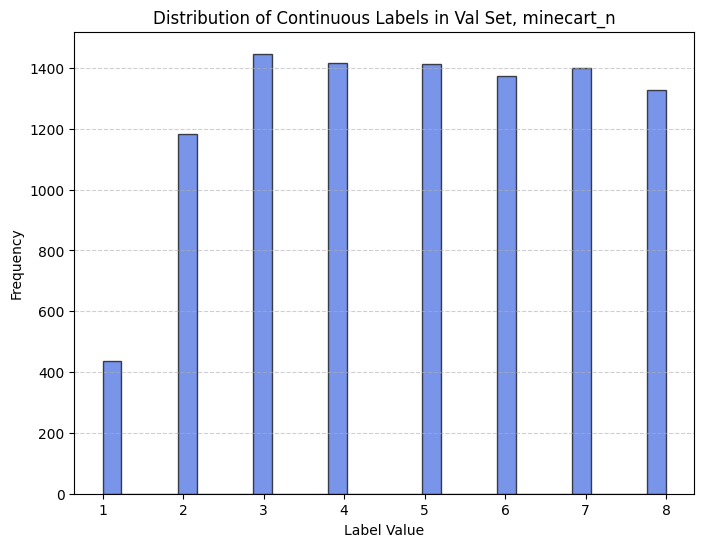

In [38]:
plot_continuous_label_distribution(minecart_n_val_set_labels, title="Distribution of Continuous Labels in Val Set, minecart_n")

In [39]:
# GoldRun validation sets
gold_above_val_set_counts = pd.read_csv("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gold_run_mini/validation_sets/gold_above_probe_example_counts_method1.csv")
lava_1_above_val_set_counts = pd.read_csv("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gold_run_mini/validation_sets/lava_1_above_probe_example_counts_method3.csv")

gold_above_val_set = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gold_run_mini/validation_sets/gold_above_probe_validation_dataset_method1.npy")
lava_1_above_val_set = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gold_run_mini/validation_sets/lava_1_above_probe_validation_dataset_method3.npy")

gold_above_val_set_labels = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gold_run_mini/validation_sets/gold_above_probe_validation_label_set_method1.npy")
lava_1_above_val_set_labels = np.load("../../rl_tcav_data/cavs/baseline_concept_probes_experiment/gold_run_mini/validation_sets/lava_1_above_probe_validation_label_set_method3.npy")

print(f"Equal n of examples and labels, gold_above: {len(gold_above_val_set) == len(gold_above_val_set_labels)}")
print(f"Equal n of examples and labels, lava_1_above: {len(lava_1_above_val_set) == len(lava_1_above_val_set_labels)}")


Equal n of examples and labels, gold_above: True
Equal n of examples and labels, lava_1_above: True


/var/folders/9w/2pytp4_s6bj5_ff4zz3vl8ph0000gn/T/ipykernel_23743/1060496315.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  approach_colors = plt.cm.get_cmap("Set2", len(unique_approaches))


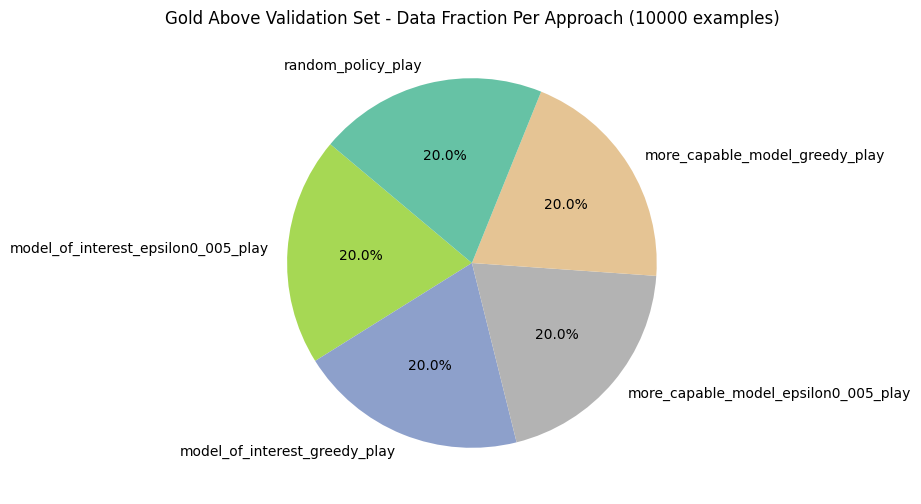

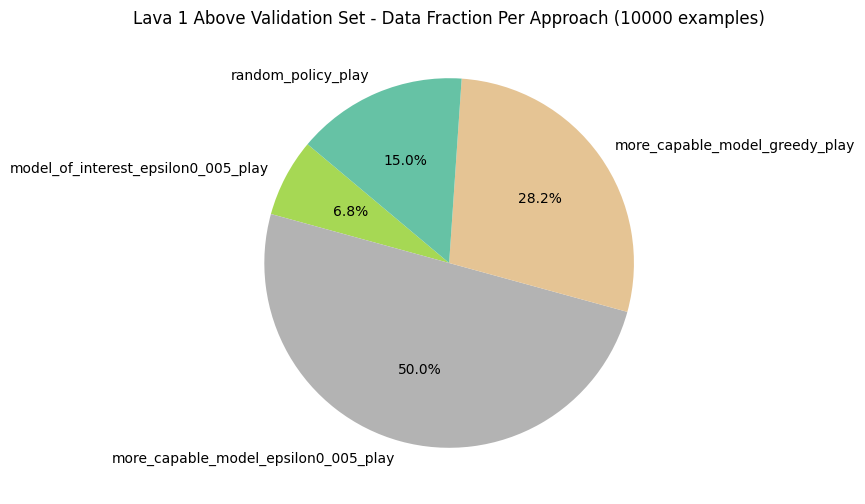

In [40]:
approach_color_map = get_approach_color_map(gold_above_val_set_counts)



plot_pie_chart(gold_above_val_set_counts, f"Gold Above Validation Set - Data Fraction Per Approach ({len(gold_above_val_set)} examples)", "Total Count", approach_color_map)
plot_pie_chart(lava_1_above_val_set_counts, f"Lava 1 Above Validation Set - Data Fraction Per Approach ({len(lava_1_above_val_set)} examples)", "Total Count", approach_color_map)


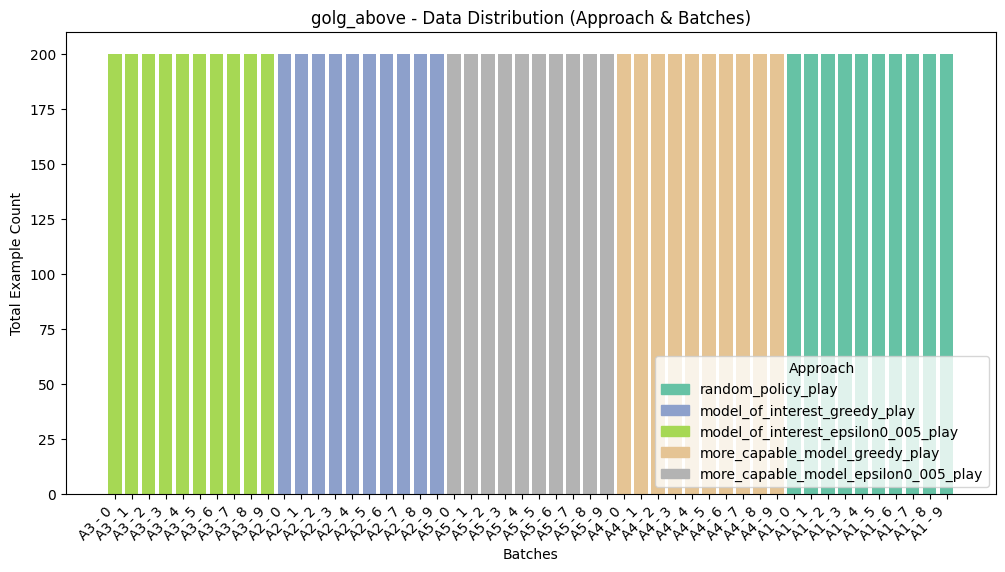

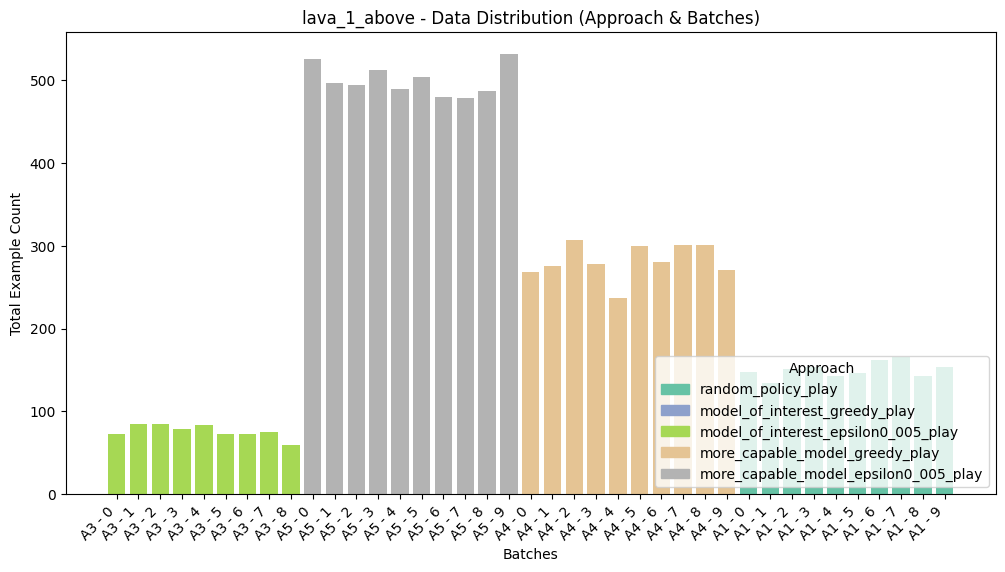

In [41]:
approach_mapping = {
    approach: str(i + 1) for i, approach in enumerate(gold_above_val_set_counts["Approach"].unique())
}

gold_above_val_set_counts["Batch Label"] = "A" + gold_above_val_set_counts["Approach"].map(approach_mapping) + " - " + gold_above_val_set_counts["Batch"].astype(str)
lava_1_above_val_set_counts["Batch Label"] = "A" + lava_1_above_val_set_counts["Approach"].map(approach_mapping) + " - " + lava_1_above_val_set_counts["Batch"].astype(str)

plot_approach_batch_bar_chart(gold_above_val_set_counts, "golg_above - Data Distribution (Approach & Batches)", approach_color_map)
plot_approach_batch_bar_chart(lava_1_above_val_set_counts, "lava_1_above - Data Distribution (Approach & Batches)", approach_color_map)

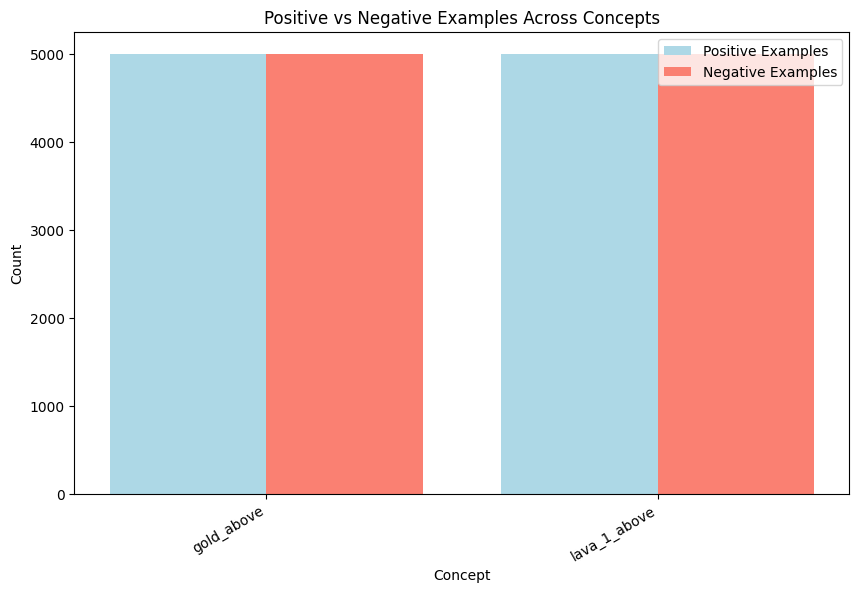

In [42]:
plot_pos_neg_counts(
    "Positive vs Negative Examples Across Concepts",
    gold_above=gold_above_val_set_counts,
    lava_1_above=lava_1_above_val_set_counts

)